In [49]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from matplotlib.path import Path
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import math
import re
import matplotlib.image as mpimg
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

location = 'upper right'
linewidth = 1
size=10
style.use("ggplot")
# plt.style.use('seaborn-dark-palette')
plt.style.use('seaborn-whitegrid')

In [2]:
# Define a function to extract the network name
def extract_network_name(var_name):
    # Find the start and end positions of the tuple within the string
    start = var_name.find('(')
    end = var_name.find(')')
    if start != -1 and end != -1:
        # Extract the tuple string and split it by comma
        tuple_str = var_name[start+1:end]
        tuple_parts = tuple_str.split(',')
        # The network name is the last part of the tuple
        network_name = tuple_parts[-1].strip().replace("'", "")
        return network_name
    return None

def extract_node_number(var_name):
    # Use regular expression to find the node number
    match = re.search(r'(\d+)', var_name)
    if match:
        return int(match.group())
    return None

demand = {'Gas': {'Gas_node_3': 217.3, 'Gas_node_4': 154.9, 'Gas_node_5': 266.8, 'Gas_node_6': 17.7, 'Gas_node_7': 22.9, 'Gas_node_8': 68.6, 'Gas_node_9': 47.0, 'Gas_node_10': 13.4, 'Gas_node_11': 3.4, 'Gas_node_12': 14.2, 'Gas_node_13': 25.3, 'Gas_node_14': 11.5, 'Gas_node_15': 137.0}, 'Power': {'Power_node_9': 9.777975497, 'Power_node_10': 53.84153027, 'Power_node_11': 27.10716836, 'Power_node_12': 19.66908817, 'Power_node_13': 55.7552359, 'Power_node_14': 16.72668359, 'Power_node_15': 16.75704501, 'Power_node_16': 10.80638959, 'Power_node_17': 0.316401109, 'Power_node_18': 6.252251204, 'Power_node_19': 29.64691932, 'Power_node_20': 32.47823896, 'Power_node_21': 36.98167494, 'Power_node_22': 25.97081786, 'Power_node_23': 37.7794295, 'Power_node_24': 58.98713969, 'Power_node_25': 48.0024627, 'Power_node_26': 19.09654231, 'Power_node_27': 32.69737324, 'Power_node_28': 25.40134154, 'Power_node_29': 4.382616987, 'Power_node_30': 22.90754838, 'Power_node_31': 22.20482407, 'Power_node_32': 32.74613032, 'Power_node_33': 32.10891415, 'Power_node_34': 9.796453251, 'Power_node_35': 16.02433749, 'Power_node_36': 13.44535955, 'Power_node_37': 19.81595579, 'Power_node_38': 12.95349404, 'Power_node_39': 22.71395364, 'Power_node_40': 16.35711169, 'Power_node_41': 6.208486796, 'Power_node_42': 0.201951604, 'Power_node_43': 2.773539927, 'Power_node_44': 4.515513246, 'Power_node_45': 20.54463635, 'Power_node_46': 32.95556248, 'Power_node_47': 24.73559969, 'Power_node_48': 30.4131649, 'Power_node_49': 53.68724181, 'Power_node_50': 34.45589509}, 'Water': {'Water_node_15': 42.651, 'Water_node_16': 55.167, 'Water_node_17': 50.204, 'Water_node_18': 23.187, 'Water_node_19': 72.332, 'Water_node_20': 7.493, 'Water_node_21': 14.845, 'Water_node_22': 42.635, 'Water_node_23': 23.465, 'Water_node_24': 117.6, 'Water_node_25': 25.743, 'Water_node_26': 31.052, 'Water_node_27': 64.456, 'Water_node_28': 44.205, 'Water_node_29': 40.688, 'Water_node_30': 94.542, 'Water_node_31': 15.775, 'Water_node_32': 18.855, 'Water_node_33': 38.4, 'Water_node_34': 100.632, 'Water_node_35': 21.836, 'Water_node_36': 4.787, 'Water_node_37': 0.503, 'Water_node_38': 18.15, 'Water_node_39': 8.237, 'Water_node_40': 1.483, 'Water_node_41': 4.046, 'Water_node_42': 2.958, 'Water_node_43': 7.225, 'Water_node_44': 0.422, 'Water_node_45': 1.738, 'Water_node_46': 0.985, 'Water_node_47': 1.408, 'Water_node_48': 2.295}}

# Create a new dictionary to store the modified keys
modified_demand = {}
for energy_type, inner_dict in demand.items():
    # Create a new inner dictionary with modified keys
    modified_inner_dict = {int(node.split('_')[-1]): value for node, value in inner_dict.items()}
    # Store the modified inner dictionary in the new dictionary
    modified_demand[energy_type] = modified_inner_dict
demand = modified_demand

# Dictionary to store max demand values for each key
max_demand = {}

# Iterate over each key in the demand dictionary
for k, inner_dict in demand.items():
    # Compute the max demand value for the current key
    max_value = max(inner_dict.values())
    # Store the max value in the max_demand dictionary
    max_demand[k] = max_value

# # Print the max demand for each key
# print(max_demand)

demand_nodes = {k:[i for i in demand[k].keys()] for k in demand.keys()}

N_k_s = {'Gas': ['Gas_node_0', 'Gas_node_1', 'Gas_node_2'], 'Power': ['Power_node_0', 'Power_node_1', 'Power_node_2', 'Power_node_3', 'Power_node_4', 'Power_node_5', 'Power_node_6', 'Power_node_7', 'Power_node_8'], 'Water': ['Water_node_0', 'Water_node_1', 'Water_node_2', 'Water_node_3', 'Water_node_4', 'Water_node_5', 'Water_node_6', 'Water_node_7', 'Water_node_8', 'Water_node_9', 'Water_node_10', 'Water_node_11', 'Water_node_12', 'Water_node_13', 'Water_node_14']}

modified_N_k_s = {}
for energy_type, inner_list in N_k_s.items():
    # Create a new inner dictionary with modified keys
    modified_inner_list = [int(node.split('_')[-1]) for node in inner_list]
    # Store the modified inner dictionary in the new dictionary
    modified_N_k_s[energy_type] = modified_inner_list
supply_nodes = modified_N_k_s

N_k_nod = {'Gas': [], 'Power': ['Power_node_51', 'Power_node_52', 'Power_node_53', 'Power_node_54', 'Power_node_55', 'Power_node_56', 'Power_node_57', 'Power_node_58', 'Power_node_59', 'Power_node_60', 'Power_node_61', 'Power_node_62', 'Power_node_63', 'Power_node_64', 'Power_node_65', 'Power_node_66', 'Power_node_67', 'Power_node_68', 'Power_node_69', 'Power_node_70', 'Power_node_71', 'Power_node_72', 'Power_node_73', 'Power_node_74'], 'Water': []}

modified_N_k_nod = {}
for energy_type, inner_list in N_k_nod.items():
    # Create a new inner dictionary with modified keys
    modified_inner_list = [int(node.split('_')[-1]) for node in inner_list]
    # Store the modified inner dictionary in the new dictionary
    modified_N_k_nod[energy_type] = modified_inner_list
transshipment_nodes = modified_N_k_nod

A_k = {'Gas': [('Gas_node_9', 'Gas_node_0'), ('Gas_node_0', 'Gas_node_3'), ('Gas_node_0', 'Gas_node_5'), ('Gas_node_5', 'Gas_node_1'), ('Gas_node_1', 'Gas_node_13'), ('Gas_node_13', 'Gas_node_7'), ('Gas_node_7', 'Gas_node_8'), ('Gas_node_8', 'Gas_node_15'), ('Gas_node_5', 'Gas_node_4'), ('Gas_node_4', 'Gas_node_10'), ('Gas_node_10', 'Gas_node_5'), ('Gas_node_10', 'Gas_node_2'), ('Gas_node_2', 'Gas_node_11'), ('Gas_node_11', 'Gas_node_12'), ('Gas_node_11', 'Gas_node_6'), ('Gas_node_6', 'Gas_node_13'), ('Gas_node_13', 'Gas_node_14'), ('Gas_node_0', 'Gas_node_9'), ('Gas_node_3', 'Gas_node_0'), ('Gas_node_5', 'Gas_node_0'), ('Gas_node_1', 'Gas_node_5'), ('Gas_node_13', 'Gas_node_1'), ('Gas_node_7', 'Gas_node_13'), ('Gas_node_8', 'Gas_node_7'), ('Gas_node_15', 'Gas_node_8'), ('Gas_node_4', 'Gas_node_5'), ('Gas_node_10', 'Gas_node_4'), ('Gas_node_5', 'Gas_node_10'), ('Gas_node_2', 'Gas_node_10'), ('Gas_node_11', 'Gas_node_2'), ('Gas_node_12', 'Gas_node_11'), ('Gas_node_6', 'Gas_node_11'), ('Gas_node_13', 'Gas_node_6'), ('Gas_node_14', 'Gas_node_13')], 'Power': [('Power_node_71', 'Power_node_7'), ('Power_node_71', 'Power_node_70'), ('Power_node_71', 'Power_node_68'), ('Power_node_1', 'Power_node_31'), ('Power_node_12', 'Power_node_10'), ('Power_node_9', 'Power_node_10'), ('Power_node_12', 'Power_node_9'), ('Power_node_36', 'Power_node_3'), ('Power_node_34', 'Power_node_36'), ('Power_node_34', 'Power_node_18'), ('Power_node_18', 'Power_node_17'), ('Power_node_35', 'Power_node_3'), ('Power_node_35', 'Power_node_33'), ('Power_node_2', 'Power_node_33'), ('Power_node_28', 'Power_node_15'), ('Power_node_7', 'Power_node_8'), ('Power_node_72', 'Power_node_25'), ('Power_node_25', 'Power_node_62'), ('Power_node_73', 'Power_node_71'), ('Power_node_69', 'Power_node_39'), ('Power_node_68', 'Power_node_44'), ('Power_node_6', 'Power_node_67'), ('Power_node_39', 'Power_node_66'), ('Power_node_66', 'Power_node_57'), ('Power_node_40', 'Power_node_57'), ('Power_node_57', 'Power_node_38'), ('Power_node_3', 'Power_node_55'), ('Power_node_55', 'Power_node_54'), ('Power_node_54', 'Power_node_65'), ('Power_node_54', 'Power_node_22'), ('Power_node_65', 'Power_node_21'), ('Power_node_65', 'Power_node_5'), ('Power_node_5', 'Power_node_48'), ('Power_node_63', 'Power_node_49'), ('Power_node_4', 'Power_node_63'), ('Power_node_20', 'Power_node_4'), ('Power_node_50', 'Power_node_20'), ('Power_node_61', 'Power_node_50'), ('Power_node_37', 'Power_node_31'), ('Power_node_64', 'Power_node_37'), ('Power_node_5', 'Power_node_64'), ('Power_node_5', 'Power_node_64'), ('Power_node_61', 'Power_node_13'), ('Power_node_13', 'Power_node_11'), ('Power_node_74', 'Power_node_4'), ('Power_node_69', 'Power_node_67'), ('Power_node_70', 'Power_node_72'), ('Power_node_60', 'Power_node_1'), ('Power_node_60', 'Power_node_12'), ('Power_node_58', 'Power_node_60'), ('Power_node_58', 'Power_node_30'), ('Power_node_14', 'Power_node_2'), ('Power_node_2', 'Power_node_15'), ('Power_node_15', 'Power_node_59'), ('Power_node_27', 'Power_node_59'), ('Power_node_59', 'Power_node_14'), ('Power_node_32', 'Power_node_30'), ('Power_node_32', 'Power_node_31'), ('Power_node_19', 'Power_node_21'), ('Power_node_52', 'Power_node_18'), ('Power_node_52', 'Power_node_53'), ('Power_node_53', 'Power_node_16'), ('Power_node_53', 'Power_node_2'), ('Power_node_51', 'Power_node_52'), ('Power_node_29', 'Power_node_51'), ('Power_node_0', 'Power_node_51'), ('Power_node_0', 'Power_node_17'), ('Power_node_0', 'Power_node_56'), ('Power_node_28', 'Power_node_56'), ('Power_node_56', 'Power_node_26'), ('Power_node_26', 'Power_node_9'), ('Power_node_74', 'Power_node_47'), ('Power_node_4', 'Power_node_46'), ('Power_node_8', 'Power_node_73'), ('Power_node_72', 'Power_node_73'), ('Power_node_68', 'Power_node_45'), ('Power_node_70', 'Power_node_69'), ('Power_node_38', 'Power_node_3'), ('Power_node_24', 'Power_node_5'), ('Power_node_24', 'Power_node_67'), ('Power_node_55', 'Power_node_39'), ('Power_node_6', 'Power_node_66'), ('Power_node_6', 'Power_node_44'), ('Power_node_23', 'Power_node_45'), ('Power_node_62', 'Power_node_63'), ('Power_node_4', 'Power_node_62'), ('Power_node_11', 'Power_node_74'), ('Power_node_1', 'Power_node_61'), ('Power_node_14', 'Power_node_58'), ('Power_node_49', 'Power_node_23'), ('Power_node_41', 'Power_node_6'), ('Power_node_42', 'Power_node_6'), ('Power_node_43', 'Power_node_6'), ('Power_node_7', 'Power_node_71'), ('Power_node_70', 'Power_node_71'), ('Power_node_68', 'Power_node_71'), ('Power_node_31', 'Power_node_1'), ('Power_node_10', 'Power_node_12'), ('Power_node_10', 'Power_node_9'), ('Power_node_9', 'Power_node_12'), ('Power_node_3', 'Power_node_36'), ('Power_node_36', 'Power_node_34'), ('Power_node_18', 'Power_node_34'), ('Power_node_17', 'Power_node_18'), ('Power_node_3', 'Power_node_35'), ('Power_node_33', 'Power_node_35'), ('Power_node_33', 'Power_node_2'), ('Power_node_15', 'Power_node_28'), ('Power_node_8', 'Power_node_7'), ('Power_node_25', 'Power_node_72'), ('Power_node_62', 'Power_node_25'), ('Power_node_71', 'Power_node_73'), ('Power_node_39', 'Power_node_69'), ('Power_node_44', 'Power_node_68'), ('Power_node_67', 'Power_node_6'), ('Power_node_66', 'Power_node_39'), ('Power_node_57', 'Power_node_66'), ('Power_node_57', 'Power_node_40'), ('Power_node_38', 'Power_node_57'), ('Power_node_55', 'Power_node_3'), ('Power_node_54', 'Power_node_55'), ('Power_node_65', 'Power_node_54'), ('Power_node_22', 'Power_node_54'), ('Power_node_21', 'Power_node_65'), ('Power_node_5', 'Power_node_65'), ('Power_node_48', 'Power_node_5'), ('Power_node_49', 'Power_node_63'), ('Power_node_63', 'Power_node_4'), ('Power_node_4', 'Power_node_20'), ('Power_node_20', 'Power_node_50'), ('Power_node_50', 'Power_node_61'), ('Power_node_31', 'Power_node_37'), ('Power_node_37', 'Power_node_64'), ('Power_node_64', 'Power_node_5'), ('Power_node_13', 'Power_node_61'), ('Power_node_11', 'Power_node_13'), ('Power_node_4', 'Power_node_74'), ('Power_node_67', 'Power_node_69'), ('Power_node_72', 'Power_node_70'), ('Power_node_1', 'Power_node_60'), ('Power_node_12', 'Power_node_60'), ('Power_node_60', 'Power_node_58'), ('Power_node_30', 'Power_node_58'), ('Power_node_2', 'Power_node_14'), ('Power_node_15', 'Power_node_2'), ('Power_node_59', 'Power_node_15'), ('Power_node_59', 'Power_node_27'), ('Power_node_14', 'Power_node_59'), ('Power_node_30', 'Power_node_32'), ('Power_node_31', 'Power_node_32'), ('Power_node_21', 'Power_node_19'), ('Power_node_18', 'Power_node_52'), ('Power_node_53', 'Power_node_52'), ('Power_node_16', 'Power_node_53'), ('Power_node_2', 'Power_node_53'), ('Power_node_52', 'Power_node_51'), ('Power_node_51', 'Power_node_29'), ('Power_node_51', 'Power_node_0'), ('Power_node_17', 'Power_node_0'), ('Power_node_56', 'Power_node_0'), ('Power_node_56', 'Power_node_28'), ('Power_node_26', 'Power_node_56'), ('Power_node_9', 'Power_node_26'), ('Power_node_47', 'Power_node_74'), ('Power_node_46', 'Power_node_4'), ('Power_node_73', 'Power_node_8'), ('Power_node_73', 'Power_node_72'), ('Power_node_45', 'Power_node_68'), ('Power_node_69', 'Power_node_70'), ('Power_node_3', 'Power_node_38'), ('Power_node_5', 'Power_node_24'), ('Power_node_67', 'Power_node_24'), ('Power_node_39', 'Power_node_55'), ('Power_node_66', 'Power_node_6'), ('Power_node_44', 'Power_node_6'), ('Power_node_45', 'Power_node_23'), ('Power_node_63', 'Power_node_62'), ('Power_node_62', 'Power_node_4'), ('Power_node_74', 'Power_node_11'), ('Power_node_61', 'Power_node_1'), ('Power_node_58', 'Power_node_14'), ('Power_node_23', 'Power_node_49'), ('Power_node_6', 'Power_node_41'), ('Power_node_6', 'Power_node_42'), ('Power_node_6', 'Power_node_43')], 'Water': [('Water_node_0', 'Water_node_16'), ('Water_node_15', 'Water_node_0'), ('Water_node_3', 'Water_node_0'), ('Water_node_2', 'Water_node_1'), ('Water_node_1', 'Water_node_15'), ('Water_node_20', 'Water_node_2'), ('Water_node_19', 'Water_node_20'), ('Water_node_15', 'Water_node_17'), ('Water_node_18', 'Water_node_17'), ('Water_node_17', 'Water_node_3'), ('Water_node_25', 'Water_node_3'), ('Water_node_19', 'Water_node_18'), ('Water_node_22', 'Water_node_18'), ('Water_node_1', 'Water_node_19'), ('Water_node_3', 'Water_node_24'), ('Water_node_19', 'Water_node_4'), ('Water_node_4', 'Water_node_22'), ('Water_node_5', 'Water_node_22'), ('Water_node_17', 'Water_node_5'), ('Water_node_24', 'Water_node_5'), ('Water_node_26', 'Water_node_5'), ('Water_node_27', 'Water_node_25'), ('Water_node_29', 'Water_node_25'), ('Water_node_9', 'Water_node_27'), ('Water_node_4', 'Water_node_26'), ('Water_node_7', 'Water_node_26'), ('Water_node_5', 'Water_node_30'), ('Water_node_8', 'Water_node_30'), ('Water_node_10', 'Water_node_30'), ('Water_node_30', 'Water_node_7'), ('Water_node_33', 'Water_node_7'), ('Water_node_21', 'Water_node_28'), ('Water_node_4', 'Water_node_21'), ('Water_node_7', 'Water_node_28'), ('Water_node_32', 'Water_node_28'), ('Water_node_23', 'Water_node_6'), ('Water_node_25', 'Water_node_23'), ('Water_node_29', 'Water_node_6'), ('Water_node_31', 'Water_node_6'), ('Water_node_24', 'Water_node_8'), ('Water_node_27', 'Water_node_8'), ('Water_node_9', 'Water_node_8'), ('Water_node_34', 'Water_node_8'), ('Water_node_10', 'Water_node_34'), ('Water_node_9', 'Water_node_31'), ('Water_node_35', 'Water_node_31'), ('Water_node_29', 'Water_node_9'), ('Water_node_10', 'Water_node_33'), ('Water_node_33', 'Water_node_32'), ('Water_node_36', 'Water_node_32'), ('Water_node_38', 'Water_node_10'), ('Water_node_38', 'Water_node_36'), ('Water_node_12', 'Water_node_36'), ('Water_node_44', 'Water_node_12'), ('Water_node_39', 'Water_node_38'), ('Water_node_40', 'Water_node_11'), ('Water_node_48', 'Water_node_11'), ('Water_node_13', 'Water_node_48'), ('Water_node_37', 'Water_node_40'), ('Water_node_11', 'Water_node_37'), ('Water_node_13', 'Water_node_40'), ('Water_node_43', 'Water_node_45'), ('Water_node_44', 'Water_node_42'), ('Water_node_42', 'Water_node_43'), ('Water_node_14', 'Water_node_45'), ('Water_node_45', 'Water_node_44'), ('Water_node_46', 'Water_node_44'), ('Water_node_47', 'Water_node_46'), ('Water_node_45', 'Water_node_47'), ('Water_node_41', 'Water_node_14'), ('Water_node_13', 'Water_node_14'), ('Water_node_16', 'Water_node_0'), ('Water_node_0', 'Water_node_15'), ('Water_node_0', 'Water_node_3'), ('Water_node_1', 'Water_node_2'), ('Water_node_15', 'Water_node_1'), ('Water_node_2', 'Water_node_20'), ('Water_node_20', 'Water_node_19'), ('Water_node_17', 'Water_node_15'), ('Water_node_17', 'Water_node_18'), ('Water_node_3', 'Water_node_17'), ('Water_node_3', 'Water_node_25'), ('Water_node_18', 'Water_node_19'), ('Water_node_18', 'Water_node_22'), ('Water_node_19', 'Water_node_1'), ('Water_node_24', 'Water_node_3'), ('Water_node_4', 'Water_node_19'), ('Water_node_22', 'Water_node_4'), ('Water_node_22', 'Water_node_5'), ('Water_node_5', 'Water_node_17'), ('Water_node_5', 'Water_node_24'), ('Water_node_5', 'Water_node_26'), ('Water_node_25', 'Water_node_27'), ('Water_node_25', 'Water_node_29'), ('Water_node_27', 'Water_node_9'), ('Water_node_26', 'Water_node_4'), ('Water_node_26', 'Water_node_7'), ('Water_node_30', 'Water_node_5'), ('Water_node_30', 'Water_node_8'), ('Water_node_30', 'Water_node_10'), ('Water_node_7', 'Water_node_30'), ('Water_node_7', 'Water_node_33'), ('Water_node_28', 'Water_node_21'), ('Water_node_21', 'Water_node_4'), ('Water_node_28', 'Water_node_7'), ('Water_node_28', 'Water_node_32'), ('Water_node_6', 'Water_node_23'), ('Water_node_23', 'Water_node_25'), ('Water_node_6', 'Water_node_29'), ('Water_node_6', 'Water_node_31'), ('Water_node_8', 'Water_node_24'), ('Water_node_8', 'Water_node_27'), ('Water_node_8', 'Water_node_9'), ('Water_node_8', 'Water_node_34'), ('Water_node_34', 'Water_node_10'), ('Water_node_31', 'Water_node_9'), ('Water_node_31', 'Water_node_35'), ('Water_node_9', 'Water_node_29'), ('Water_node_33', 'Water_node_10'), ('Water_node_32', 'Water_node_33'), ('Water_node_32', 'Water_node_36'), ('Water_node_10', 'Water_node_38'), ('Water_node_36', 'Water_node_38'), ('Water_node_36', 'Water_node_12'), ('Water_node_12', 'Water_node_44'), ('Water_node_38', 'Water_node_39'), ('Water_node_11', 'Water_node_40'), ('Water_node_11', 'Water_node_48'), ('Water_node_48', 'Water_node_13'), ('Water_node_40', 'Water_node_37'), ('Water_node_37', 'Water_node_11'), ('Water_node_40', 'Water_node_13'), ('Water_node_45', 'Water_node_43'), ('Water_node_42', 'Water_node_44'), ('Water_node_43', 'Water_node_42'), ('Water_node_45', 'Water_node_14'), ('Water_node_44', 'Water_node_45'), ('Water_node_44', 'Water_node_46'), ('Water_node_46', 'Water_node_47'), ('Water_node_47', 'Water_node_45'), ('Water_node_14', 'Water_node_41'), ('Water_node_14', 'Water_node_13')]}

# Create a new dictionary to store the modified keys
modified_A_k = {}
for energy_type, inner_list in A_k.items():
    # Create a new inner dictionary with modified keys
    modified_inner_list = [(int(node_tuple[0].split('_')[-1]),int(node_tuple[1].split('_')[-1])) for node_tuple in inner_list]
    # Store the modified inner dictionary in the new dictionary
    modified_A_k[energy_type] = modified_inner_list
A_k = modified_A_k

gamma = {('Power_node_13', 'Water_node_0', 'Power', 'Water', 0): 1, ('Power_node_26', 'Water_node_1', 'Power', 'Water', 0): 1, ('Power_node_27', 'Water_node_1', 'Power', 'Water', 0): 1, ('Power_node_28', 'Water_node_2', 'Power', 'Water', 0): 1, ('Power_node_10', 'Water_node_3', 'Power', 'Water', 0): 1, ('Power_node_15', 'Water_node_4', 'Power', 'Water', 0): 1, ('Power_node_16', 'Water_node_4', 'Power', 'Water', 0): 1, ('Power_node_33', 'Water_node_4', 'Power', 'Water', 0): 1, ('Power_node_32', 'Water_node_5', 'Power', 'Water', 0): 1, ('Power_node_25', 'Water_node_6', 'Power', 'Water', 0): 1, ('Power_node_22', 'Water_node_7', 'Power', 'Water', 0): 1, ('Power_node_36', 'Water_node_7', 'Power', 'Water', 0): 1, ('Power_node_35', 'Water_node_7', 'Power', 'Water', 0): 1, ('Power_node_48', 'Water_node_8', 'Power', 'Water', 0): 1, ('Power_node_23', 'Water_node_8', 'Power', 'Water', 0): 1, ('Power_node_49', 'Water_node_9', 'Power', 'Water', 0): 1, ('Power_node_41', 'Water_node_10', 'Power', 'Water', 0): 1, ('Power_node_8', 'Water_node_11', 'Power', 'Water', 0): 1, ('Power_node_6', 'Water_node_12', 'Power', 'Water', 0): 1, ('Power_node_7', 'Water_node_13', 'Power', 'Water', 0): 1, ('Power_node_7', 'Water_node_14', 'Power', 'Water', 0): 1, ('Water_node_30', 'Power_node_3', 'Water', 'Power', 0): 1, ('Power_node_26', 'Gas_node_0', 'Power', 'Gas', 0): 1, ('Power_node_49', 'Gas_node_1', 'Power', 'Gas', 0): 1, ('Power_node_8', 'Gas_node_2', 'Power', 'Gas', 0): 1, ('Gas_node_9', 'Power_node_0', 'Gas', 'Power', 0): 1, ('Gas_node_3', 'Power_node_2', 'Gas', 'Power', 0): 1}
modified_gamma = [(int(node_tuple[0].split('_')[-1]),int(node_tuple[1].split('_')[-1]),node_tuple[2],node_tuple[3]) for node_tuple, value in gamma.items()]
gamma = modified_gamma

x_coord = {'Gas': {"('Gas_node_0', 'Gas', 'Gas')": -90.0999798, "('Gas_node_1', 'Gas', 'Gas')": -89.78163161, "('Gas_node_2', 'Gas', 'Gas')": -89.67707961, "('Gas_node_3', 'Gas', 'Gas')": -89.98803481, "('Gas_node_4', 'Gas', 'Gas')": -89.95653054, "('Gas_node_5', 'Gas', 'Gas')": -89.82055292, "('Gas_node_6', 'Gas', 'Gas')": -89.69923838, "('Gas_node_7', 'Gas', 'Gas')": -89.72597604, "('Gas_node_8', 'Gas', 'Gas')": -89.73156616, "('Gas_node_9', 'Gas', 'Gas')": -90.16256275, "('Gas_node_10', 'Gas', 'Gas')": -89.74435889, "('Gas_node_11', 'Gas', 'Gas')": -89.68043917, "('Gas_node_12', 'Gas', 'Gas')": -89.6722479, "('Gas_node_13', 'Gas', 'Gas')": -89.7254578, "('Gas_node_14', 'Gas', 'Gas')": -89.6269935, "('Gas_node_15', 'Gas', 'Gas')": -89.73761922}, 'Power': {"('Power_node_0', 'Power', 'Power')": -90.14906409, "('Power_node_1', 'Power', 'Power')": -89.87813148, "('Power_node_2', 'Power', 'Power')": -90.00766863, "('Power_node_3', 'Power', 'Power')": -90.02310761, "('Power_node_4', 'Power', 'Power')": -89.74330958, "('Power_node_5', 'Power', 'Power')": -89.89954409, "('Power_node_6', 'Power', 'Power')": -89.96061885, "('Power_node_7', 'Power', 'Power')": -89.80356584, "('Power_node_8', 'Power', 'Power')": -89.65213079, "('Power_node_9', 'Power', 'Power')": -89.93490245, "('Power_node_10', 'Power', 'Power')": -89.8761211, "('Power_node_11', 'Power', 'Power')": -89.7412622, "('Power_node_12', 'Power', 'Power')": -89.91668434, "('Power_node_13', 'Power', 'Power')": -89.79803104, "('Power_node_14', 'Power', 'Power')": -89.95284021, "('Power_node_15', 'Power', 'Power')": -90.00982705, "('Power_node_16', 'Power', 'Power')": -90.05059892, "('Power_node_17', 'Power', 'Power')": -90.13608062, "('Power_node_18', 'Power', 'Power')": -90.06367138, "('Power_node_19', 'Power', 'Power')": -89.96440153, "('Power_node_20', 'Power', 'Power')": -89.77068835, "('Power_node_21', 'Power', 'Power')": -89.94870857, "('Power_node_22', 'Power', 'Power')": -89.9904572, "('Power_node_23', 'Power', 'Power')": -89.83973084, "('Power_node_24', 'Power', 'Power')": -89.90196651, "('Power_node_25', 'Power', 'Power')": -89.70905035, "('Power_node_26', 'Power', 'Power')": -90.04743138, "('Power_node_27', 'Power', 'Power')": -90.00682341, "('Power_node_28', 'Power', 'Power')": -90.09529954, "('Power_node_29', 'Power', 'Power')": -90.08061442, "('Power_node_30', 'Power', 'Power')": -89.93252578, "('Power_node_31', 'Power', 'Power')": -89.87130544, "('Power_node_32', 'Power', 'Power')": -89.93019317, "('Power_node_33', 'Power', 'Power')": -90.01252161, "('Power_node_34', 'Power', 'Power')": -90.05396491, "('Power_node_35', 'Power', 'Power')": -90.03048048, "('Power_node_36', 'Power', 'Power')": -90.05037583, "('Power_node_37', 'Power', 'Power')": -89.86945614, "('Power_node_38', 'Power', 'Power')": -90.05574743, "('Power_node_39', 'Power', 'Power')": -89.9622079, "('Power_node_40', 'Power', 'Power')": -89.99603025, "('Power_node_41', 'Power', 'Power')": -89.97150997, "('Power_node_42', 'Power', 'Power')": -89.97316408, "('Power_node_43', 'Power', 'Power')": -89.97353824, "('Power_node_44', 'Power', 'Power')": -89.95784035, "('Power_node_45', 'Power', 'Power')": -89.89269247, "('Power_node_46', 'Power', 'Power')": -89.65428902, "('Power_node_47', 'Power', 'Power')": -89.73660434, "('Power_node_48', 'Power', 'Power')": -89.85857631, "('Power_node_49', 'Power', 'Power')": -89.79428213, "('Power_node_50', 'Power', 'Power')": -89.82966416, "('Power_node_51', 'Power', 'Power')": -90.07083199, "('Power_node_52', 'Power', 'Power')": -90.06336594, "('Power_node_53', 'Power', 'Power')": -90.05519945, "('Power_node_54', 'Power', 'Power')": -89.99030542, "('Power_node_55', 'Power', 'Power')": -90.00086796, "('Power_node_56', 'Power', 'Power')": -90.13325859, "('Power_node_57', 'Power', 'Power')": -89.98464664, "('Power_node_58', 'Power', 'Power')": -89.9327441, "('Power_node_59', 'Power', 'Power')": -89.99713573, "('Power_node_60', 'Power', 'Power')": -89.90907623, "('Power_node_61', 'Power', 'Power')": -89.87064219, "('Power_node_62', 'Power', 'Power')": -89.7350198, "('Power_node_63', 'Power', 'Power')": -89.74331303, "('Power_node_64', 'Power', 'Power')": -89.87746431, "('Power_node_65', 'Power', 'Power')": -89.94916624, "('Power_node_66', 'Power', 'Power')": -89.96076349, "('Power_node_67', 'Power', 'Power')": -89.9023013, "('Power_node_68', 'Power', 'Power')": -89.89244061, "('Power_node_69', 'Power', 'Power')": -89.8766786, "('Power_node_70', 'Power', 'Power')": -89.85856119, "('Power_node_71', 'Power', 'Power')": -89.81502931, "('Power_node_72', 'Power', 'Power')": -89.70248655, "('Power_node_73', 'Power', 'Power')": -89.70010204, "('Power_node_74', 'Power', 'Power')": -89.74100248}, 'Water': {"('Water_node_0', 'Water', 'Water')": -89.81072359, "('Water_node_1', 'Water', 'Water')": -90.01350689, "('Water_node_2', 'Water', 'Water')": -90.1180831, "('Water_node_3', 'Water', 'Water')": -89.85424473, "('Water_node_4', 'Water', 'Water')": -90.02756048, "('Water_node_5', 'Water', 'Water')": -89.93030941, "('Water_node_6', 'Water', 'Water')": -89.64163653, "('Water_node_7', 'Water', 'Water')": -90.01471543, "('Water_node_8', 'Water', 'Water')": -89.8527066, "('Water_node_9', 'Water', 'Water')": -89.75838583, "('Water_node_10', 'Water', 'Water')": -89.94980067, "('Water_node_11', 'Water', 'Water')": -89.67644063, "('Water_node_12', 'Water', 'Water')": -90.03358832, "('Water_node_13', 'Water', 'Water')": -89.71770387, "('Water_node_14', 'Water', 'Water')": -89.80639628, "('Water_node_15', 'Water', 'Water')": -89.92918924, "('Water_node_16', 'Water', 'Water')": -89.70606321, "('Water_node_17', 'Water', 'Water')": -89.92818104, "('Water_node_18', 'Water', 'Water')": -89.98241271, "('Water_node_19', 'Water', 'Water')": -90.0328948, "('Water_node_20', 'Water', 'Water')": -90.14727652, "('Water_node_21', 'Water', 'Water')": -90.06847085, "('Water_node_22', 'Water', 'Water')": -89.98516993, "('Water_node_23', 'Water', 'Water')": -89.64006118, "('Water_node_24', 'Water', 'Water')": -89.85851007, "('Water_node_25', 'Water', 'Water')": -89.72815625, "('Water_node_26', 'Water', 'Water')": -90.02180771, "('Water_node_27', 'Water', 'Water')": -89.77845963, "('Water_node_28', 'Water', 'Water')": -90.0308232, "('Water_node_29', 'Water', 'Water')": -89.73747298, "('Water_node_30', 'Water', 'Water')": -89.94613247, "('Water_node_31', 'Water', 'Water')": -89.64455051, "('Water_node_32', 'Water', 'Water')": -90.00878124, "('Water_node_33', 'Water', 'Water')": -89.97022534, "('Water_node_34', 'Water', 'Water')": -89.83747524, "('Water_node_35', 'Water', 'Water')": -89.72321767, "('Water_node_36', 'Water', 'Water')": -90.00917224, "('Water_node_37', 'Water', 'Water')": -89.74869898, "('Water_node_38', 'Water', 'Water')": -89.92224945, "('Water_node_39', 'Water', 'Water')": -89.7891992, "('Water_node_40', 'Water', 'Water')": -89.74092873, "('Water_node_41', 'Water', 'Water')": -89.80587325, "('Water_node_42', 'Water', 'Water')": -89.94223051, "('Water_node_43', 'Water', 'Water')": -89.89774729, "('Water_node_44', 'Water', 'Water')": -89.9343417, "('Water_node_45', 'Water', 'Water')": -89.89758625, "('Water_node_46', 'Water', 'Water')": -89.93619652, "('Water_node_47', 'Water', 'Water')": -89.89335641, "('Water_node_48', 'Water', 'Water')": -89.6504359}}

# Create a new dictionary to store the modified keys
modified_x = {}
for energy_type, inner_dict in x_coord.items():
    # Create a new inner dictionary with modified keys
    modified_inner_dict = {int(re.search(r'\d+', node).group()): value for node, value in inner_dict.items()}
    # Store the modified inner dictionary in the new dictionary
    modified_x[energy_type] = modified_inner_dict
x_coord = modified_x

y_coord = {'Gas': {"('Gas_node_0', 'Gas', 'Gas')": 35.00092287, "('Gas_node_1', 'Gas', 'Gas')": 35.18043243, "('Gas_node_2', 'Gas', 'Gas')": 35.3293155, "('Gas_node_3', 'Gas', 'Gas')": 34.9950598, "('Gas_node_4', 'Gas', 'Gas')": 35.2816051, "('Gas_node_5', 'Gas', 'Gas')": 35.18515738, "('Gas_node_6', 'Gas', 'Gas')": 35.20202691, "('Gas_node_7', 'Gas', 'Gas')": 35.12464127, "('Gas_node_8', 'Gas', 'Gas')": 35.08674797, "('Gas_node_9', 'Gas', 'Gas')": 35.08413268, "('Gas_node_10', 'Gas', 'Gas')": 35.34149989, "('Gas_node_11', 'Gas', 'Gas')": 35.30581549, "('Gas_node_12', 'Gas', 'Gas')": 35.28483139, "('Gas_node_13', 'Gas', 'Gas')": 35.17862393, "('Gas_node_14', 'Gas', 'Gas')": 35.17122136, "('Gas_node_15', 'Gas', 'Gas')": 35.03748893}, 'Power': {"('Power_node_0', 'Power', 'Power')": 35.07295828, "('Power_node_1', 'Power', 'Power')": 35.07533093, "('Power_node_2', 'Power', 'Power')": 35.09904434, "('Power_node_3', 'Power', 'Power')": 35.18146923, "('Power_node_4', 'Power', 'Power')": 35.17561055, "('Power_node_5', 'Power', 'Power')": 35.19208594, "('Power_node_6', 'Power', 'Power')": 35.27294718, "('Power_node_7', 'Power', 'Power')": 35.38565526, "('Power_node_8', 'Power', 'Power')": 35.35265298, "('Power_node_9', 'Power', 'Power')": 35.01865615, "('Power_node_10', 'Power', 'Power')": 35.04206689, "('Power_node_11', 'Power', 'Power')": 35.04532996, "('Power_node_12', 'Power', 'Power')": 35.05058038, "('Power_node_13', 'Power', 'Power')": 35.04008307, "('Power_node_14', 'Power', 'Power')": 35.07670017, "('Power_node_15', 'Power', 'Power')": 35.0712847, "('Power_node_16', 'Power', 'Power')": 35.08798718, "('Power_node_17', 'Power', 'Power')": 35.08696814, "('Power_node_18', 'Power', 'Power')": 35.11537826, "('Power_node_19', 'Power', 'Power')": 35.13512863, "('Power_node_20', 'Power', 'Power')": 35.14269557, "('Power_node_21', 'Power', 'Power')": 35.17296807, "('Power_node_22', 'Power', 'Power')": 35.17123319, "('Power_node_23', 'Power', 'Power')": 35.18579136, "('Power_node_24', 'Power', 'Power')": 35.22031369, "('Power_node_25', 'Power', 'Power')": 35.20725316, "('Power_node_26', 'Power', 'Power')": 34.99827698, "('Power_node_27', 'Power', 'Power')": 35.03241546, "('Power_node_28', 'Power', 'Power')": 35.04371994, "('Power_node_29', 'Power', 'Power')": 35.08578017, "('Power_node_30', 'Power', 'Power')": 35.08490391, "('Power_node_31', 'Power', 'Power')": 35.1002902, "('Power_node_32', 'Power', 'Power')": 35.11647665, "('Power_node_33', 'Power', 'Power')": 35.1250932, "('Power_node_34', 'Power', 'Power')": 35.13199354, "('Power_node_35', 'Power', 'Power')": 35.14398508, "('Power_node_36', 'Power', 'Power')": 35.15382173, "('Power_node_37', 'Power', 'Power')": 35.1229727, "('Power_node_38', 'Power', 'Power')": 35.21084216, "('Power_node_39', 'Power', 'Power')": 35.21474021, "('Power_node_40', 'Power', 'Power')": 35.24725386, "('Power_node_41', 'Power', 'Power')": 35.25778698, "('Power_node_42', 'Power', 'Power')": 35.26768477, "('Power_node_43', 'Power', 'Power')": 35.27523841, "('Power_node_44', 'Power', 'Power')": 35.28264806, "('Power_node_45', 'Power', 'Power')": 35.34073144, "('Power_node_46', 'Power', 'Power')": 35.07494805, "('Power_node_47', 'Power', 'Power')": 35.1018594, "('Power_node_48', 'Power', 'Power')": 35.1863499, "('Power_node_49', 'Power', 'Power')": 35.18443208, "('Power_node_50', 'Power', 'Power')": 35.09833984, "('Power_node_51', 'Power', 'Power')": 35.07817962, "('Power_node_52', 'Power', 'Power')": 35.07778839, "('Power_node_53', 'Power', 'Power')": 35.07562048, "('Power_node_54', 'Power', 'Power')": 35.19365812, "('Power_node_55', 'Power', 'Power')": 35.1949083, "('Power_node_56', 'Power', 'Power')": 35.04503356, "('Power_node_57', 'Power', 'Power')": 35.25724167, "('Power_node_58', 'Power', 'Power')": 35.07690115, "('Power_node_59', 'Power', 'Power')": 35.07104942, "('Power_node_60', 'Power', 'Power')": 35.07558076, "('Power_node_61', 'Power', 'Power')": 35.07653066, "('Power_node_62', 'Power', 'Power')": 35.18327037, "('Power_node_63', 'Power', 'Power')": 35.18317162, "('Power_node_64', 'Power', 'Power')": 35.15944678, "('Power_node_65', 'Power', 'Power')": 35.190759, "('Power_node_66', 'Power', 'Power')": 35.26765252, "('Power_node_67', 'Power', 'Power')": 35.22421338, "('Power_node_68', 'Power', 'Power')": 35.32956749, "('Power_node_69', 'Power', 'Power')": 35.25840899, "('Power_node_70', 'Power', 'Power')": 35.27825539, "('Power_node_71', 'Power', 'Power')": 35.32574529, "('Power_node_72', 'Power', 'Power')": 35.27867367, "('Power_node_73', 'Power', 'Power')": 35.30521163, "('Power_node_74', 'Power', 'Power')": 35.10188436}, 'Water': {"('Water_node_0', 'Water', 'Water')": 35.00485525, "('Water_node_1', 'Water', 'Water')": 35.00723595, "('Water_node_2', 'Water', 'Water')": 35.02483649, "('Water_node_3', 'Water', 'Water')": 35.05372432, "('Water_node_4', 'Water', 'Water')": 35.10091371, "('Water_node_5', 'Water', 'Water')": 35.114479, "('Water_node_6', 'Water', 'Water')": 35.16926573, "('Water_node_7', 'Water', 'Water')": 35.15647357, "('Water_node_8', 'Water', 'Water')": 35.18172986, "('Water_node_9', 'Water', 'Water')": 35.2006367, "('Water_node_10', 'Water', 'Water')": 35.246328, "('Water_node_11', 'Water', 'Water')": 35.32495857, "('Water_node_12', 'Water', 'Water')": 35.34209544, "('Water_node_13', 'Water', 'Water')": 35.37741124, "('Water_node_14', 'Water', 'Water')": 35.38015299, "('Water_node_15', 'Water', 'Water')": 35.0209335, "('Water_node_16', 'Water', 'Water')": 35.00136005, "('Water_node_17', 'Water', 'Water')": 35.05285945, "('Water_node_18', 'Water', 'Water')": 35.0639128, "('Water_node_19', 'Water', 'Water')": 35.06443844, "('Water_node_20', 'Water', 'Water')": 35.08710837, "('Water_node_21', 'Water', 'Water')": 35.11676474, "('Water_node_22', 'Water', 'Water')": 35.1094937, "('Water_node_23', 'Water', 'Water')": 35.09718747, "('Water_node_24', 'Water', 'Water')": 35.09762303, "('Water_node_25', 'Water', 'Water')": 35.11757418, "('Water_node_26', 'Water', 'Water')": 35.13117275, "('Water_node_27', 'Water', 'Water')": 35.12779297, "('Water_node_28', 'Water', 'Water')": 35.15991635, "('Water_node_29', 'Water', 'Water')": 35.15500143, "('Water_node_30', 'Water', 'Water')": 35.14673329, "('Water_node_31', 'Water', 'Water')": 35.20059691, "('Water_node_32', 'Water', 'Water')": 35.24010276, "('Water_node_33', 'Water', 'Water')": 35.23640693, "('Water_node_34', 'Water', 'Water')": 35.22671732, "('Water_node_35', 'Water', 'Water')": 35.27321239, "('Water_node_36', 'Water', 'Water')": 35.26743752, "('Water_node_37', 'Water', 'Water')": 35.31577403, "('Water_node_38', 'Water', 'Water')": 35.27339114, "('Water_node_39', 'Water', 'Water')": 35.29686482, "('Water_node_40', 'Water', 'Water')": 35.33492696, "('Water_node_41', 'Water', 'Water')": 35.34760639, "('Water_node_42', 'Water', 'Water')": 35.36399391, "('Water_node_43', 'Water', 'Water')": 35.35213419, "('Water_node_44', 'Water', 'Water')": 35.37630835, "('Water_node_45', 'Water', 'Water')": 35.37014056, "('Water_node_46', 'Water', 'Water')": 35.39410639, "('Water_node_47', 'Water', 'Water')": 35.39353137, "('Water_node_48', 'Water', 'Water')": 35.37893741}}

modified_y = {}
for energy_type, inner_dict in y_coord.items():
    # Create a new inner dictionary with modified keys
    modified_inner_dict = {int(re.search(r'\d+', node).group()): value for node, value in inner_dict.items()}
    # Store the modified inner dictionary in the new dictionary
    modified_y[energy_type] = modified_inner_dict
y_coord = modified_y

In [3]:
scarcity_level = 0.5
# utility_type = ['linear','power']
utility_type = ['power']
scenarios = 150
pieces_length = 1
same_probs = True
approaches = ['EEVS_mu_hat', 'WS', 'DE']

In [14]:
data = {}
for approach in approaches:
    data[approach] = pd.read_csv(f"{approach}_scarce_{scarcity_level}_utility_type_{'power'}_num_scenarios_{scenarios}_equal_probabilities_{same_probs}_nat_log_linear_pieces_length_{pieces_length}.csv")
    data[approach] = data[approach].rename(columns={list(data[approach].columns)[0]: 'var_name'})
data['DE']

,var_name,0,1,2,3,4,5,6,7,8,...,149,mean,std,min,max,median,mode,q1,q2,q3
0,proportional_fairness,117.130154,111.727253,118.654165,111.298113,113.686427,113.072728,115.324527,115.815481,110.331537,...,116.995936,112.618023,2.756620,105.850452,120.441913,112.348749,105.850452,110.501453,112.348749,114.796107
1,"alpha_('Gas_node_3', 'Gas', 'Gas')",0.362997,0.214063,0.274667,0.262106,0.386521,0.372032,0.424264,0.229074,0.310274,...,0.283560,0.325533,0.071237,0.208139,0.449803,0.329920,0.208139,0.263312,0.329920,0.384923
2,"phi_('Gas_node_3', 'Gas', 'Gas')",79.500000,73.150541,74.000000,74.000000,86.000000,85.200000,85.000000,73.600000,105.000000,...,105.000000,82.973090,10.098143,72.000000,118.000000,82.000000,86.000000,74.000000,82.000000,86.000000
3,"utility_of_phi_('Gas_node_3', 'Gas', 'Gas')",4.895845,2.506451,3.261493,3.089850,5.594014,5.226190,6.585422,2.677029,4.237622,...,3.742213,4.458216,1.488424,2.449398,7.912342,4.235892,2.449398,3.218735,4.235892,5.554352
4,"utility_of_demand_('Gas_node_3', 'Gas', 'Gas')",7.052544,3.164296,4.384433,4.097869,8.004271,7.403906,9.806885,3.430517,5.310416,...,4.599353,6.200868,2.364562,3.065014,11.251664,5.902623,3.065014,4.124549,5.902623,7.935760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,"delta_minus_('Water_node_44', 'Water', 'Water')",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
558,"delta_minus_('Water_node_45', 'Water', 'Water')",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
559,"delta_minus_('Water_node_46', 'Water', 'Water')",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
560,"delta_minus_('Water_node_47', 'Water', 'Water')",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
# Columns you don't want
stats_cols = {"mean","std","min","max","median","mode","q1","q2","q3"}

# Make phi-only subsets for each approach, keeping 'var_name' as a column
phi_data = {}
for name, df in data.items():
    # ensure var_name exists and is stringy
    assert 'var_name' in df.columns, f"'var_name' not found in {name}"
    sub = df[df['var_name'].astype(str).str.startswith('phi_')].copy()
    # drop stats columns if present
    sub = sub.drop(columns=list(stats_cols), errors='ignore')
    phi_data[name] = sub

# Optional: quick peek
for k, df in phi_data.items():
    print(k, df.shape)
    print(df.head(3))

EEVS_mu_hat (89, 151)
                            var_name      0      1      2      3      4  \
2   phi_('Gas_node_3', 'Gas', 'Gas')   77.6   77.6   77.6   77.6   77.6   
6   phi_('Gas_node_4', 'Gas', 'Gas')   86.0   83.0   70.0   78.0   71.0   
10  phi_('Gas_node_5', 'Gas', 'Gas')  129.0  132.0  145.0  137.0  144.0   

        5      6      7      8  ...    140    141    142    143    144    145  \
2    77.6   77.6   77.6   77.6  ...   77.6   77.6   77.6   77.6   77.6   77.6   
6    79.0   76.0   74.0   63.0  ...   55.0   78.0   84.0   65.0   79.0   78.0   
10  145.4  139.0  141.0  152.0  ...  160.0  137.0  138.4  162.4  136.0  137.0   

      146    147    148    149  
2    77.6   77.6   77.6   77.6  
6    72.0   58.0   55.0   94.4  
10  143.0  158.0  160.0  130.0  

[3 rows x 151 columns]
WS (89, 151)
                            var_name      0           1           2  \
2   phi_('Gas_node_3', 'Gas', 'Gas')   79.5   73.100541   73.100541   
6   phi_('Gas_node_4', 'Gas', 'Gas')   98

In [16]:
# Identify numeric columns (everything except 'var_name')
num_cols = [c for c in phi_data['DE'].columns if c != 'var_name']

# DE - EEVS
DE_EEVS_df = phi_data['DE'][['var_name']].copy()
DE_EEVS_df[num_cols] = phi_data['DE'][num_cols].values - phi_data['EEVS_mu_hat'][num_cols].values

# WS - DE
WS_DE_df = phi_data['WS'][['var_name']].copy()
WS_DE_df[num_cols] = phi_data['WS'][num_cols].values - phi_data['DE'][num_cols].values

# Optional preview
print(DE_EEVS_df.head())
print(WS_DE_df.head())

                            var_name     0         1     2    3     4    5  \
2   phi_('Gas_node_3', 'Gas', 'Gas')   1.9 -4.449459  -3.6 -3.6   8.4  7.6   
6   phi_('Gas_node_4', 'Gas', 'Gas')  13.0 -5.550541  10.0  3.0 -14.0  1.0   
10  phi_('Gas_node_5', 'Gas', 'Gas')  17.0 -9.000000  19.0  5.0 -27.0  1.6   
14  phi_('Gas_node_6', 'Gas', 'Gas')   0.0  0.000000   0.0  0.0   0.0  0.0   
18  phi_('Gas_node_7', 'Gas', 'Gas')  -3.0  0.000000   0.0  0.0   1.0  0.0   

       6     7     8  ...  140       141       142   143        144       145  \
2    7.4  -4.0  27.4  ...  3.4 -4.449459 -4.449459   8.4  -4.449459 -4.449459   
6   -7.0  12.0   9.0  ... -2.0  3.000000  4.749459  -9.0  10.000000  6.000000   
10 -13.0  22.0  21.0  ... -5.0  3.000000  5.600000 -23.2  15.000000  9.000000   
14   0.0   0.0   0.0  ...  0.0  0.000000  0.000000   0.0   0.000000  0.000000   
18   1.9   0.0  -3.0  ...  0.0  0.000000 -1.000000   0.9  -5.000000  0.000000   

          146  147        148   149  
2   13

In [33]:
DE_EEVS_df

,var_name,0,1,2,3,4,5,6,7,8,...,142,143,144,145,146,147,148,149,network_name,node
2,"phi_('Gas_node_3', 'Gas', 'Gas')",1.9,-4.449459,-3.6,-3.6,8.4,7.6,7.4,-4.0,27.4,...,-4.449459,8.4,-4.449459,-4.449459,13.550541,8.4,-4.449459,27.4,Gas,3
6,"phi_('Gas_node_4', 'Gas', 'Gas')",13.0,-5.550541,10.0,3.0,-14.0,1.0,-7.0,12.0,9.0,...,4.749459,-9.0,10.000000,6.000000,-1.000000,2.0,-2.000000,-1.4,Gas,4
10,"phi_('Gas_node_5', 'Gas', 'Gas')",17.0,-9.000000,19.0,5.0,-27.0,1.6,-13.0,22.0,21.0,...,5.600000,-23.2,15.000000,9.000000,-2.350541,3.0,-10.000000,-3.0,Gas,5
14,"phi_('Gas_node_6', 'Gas', 'Gas')",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,Gas,6
18,"phi_('Gas_node_7', 'Gas', 'Gas')",-3.0,0.000000,0.0,0.0,1.0,0.0,1.9,0.0,-3.0,...,-1.000000,0.9,-5.000000,0.000000,0.000000,0.0,4.000000,1.0,Gas,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,"phi_('Water_node_44', 'Water', 'Water')",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,Water,44
342,"phi_('Water_node_45', 'Water', 'Water')",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,Water,45
346,"phi_('Water_node_46', 'Water', 'Water')",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,Water,46
350,"phi_('Water_node_47', 'Water', 'Water')",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,Water,47


In [34]:
diff_data = {'WS_DE': WS_DE_df, 'DE_EEVS': DE_EEVS_df}

In [35]:
diff_data

{'WS_DE':                                     var_name             0             1  \
 2           phi_('Gas_node_3', 'Gas', 'Gas') -5.397283e-11 -5.000000e-02   
 6           phi_('Gas_node_4', 'Gas', 'Gas') -1.000000e+00  5.000000e-02   
 10          phi_('Gas_node_5', 'Gas', 'Gas')  1.000000e+00  1.278977e-13   
 14          phi_('Gas_node_6', 'Gas', 'Gas')  0.000000e+00  0.000000e+00   
 18          phi_('Gas_node_7', 'Gas', 'Gas') -1.918465e-12  0.000000e+00   
 ..                                       ...           ...           ...   
 338  phi_('Water_node_44', 'Water', 'Water')  0.000000e+00  0.000000e+00   
 342  phi_('Water_node_45', 'Water', 'Water')  0.000000e+00  0.000000e+00   
 346  phi_('Water_node_46', 'Water', 'Water')  0.000000e+00  0.000000e+00   
 350  phi_('Water_node_47', 'Water', 'Water')  0.000000e+00  0.000000e+00   
 354  phi_('Water_node_48', 'Water', 'Water')  0.000000e+00  0.000000e+00   
 
                 2             3      4          5     6         

In [41]:
network_allocation_data = {}

# Iterate over each scarcity level in the data dictionary
for approach, df in diff_data.items():    
    network_allocation_data[approach] = {}
    for network in ['Gas', 'Power', 'Water']:
        network_subset = {}
        # Apply the function to 'var_name' column to create a new column 'network_name'
        df['network_name'] = df['var_name'].apply(extract_network_name)
        # Apply the function to 'var_name' column to create a new column 'node'
        df['node'] = df['var_name'].apply(extract_node_number)
        df['node'].fillna(-1, inplace=True)
        df['node'] = df['node'].astype(int)
        # Filter rows where the network name is 'network'
        network_subset = df[(df['network_name'] == network)]
        # Store the subset of data in water_allocation_data dictionary
        network_allocation_data[approach][network] = network_subset

In [45]:
NON_SCENARIO = {'var_name', 'network_name', 'node'}  # cols to keep
AVG_COL = 'alloc_avg'  # name for the new column

for approach in network_allocation_data:
    for net in ['Gas', 'Power', 'Water']:
        df = network_allocation_data[approach][net].copy()

        # scenario columns = numeric columns not in NON_SCENARIO
        scenario_cols = [c for c in df.columns
                         if c not in NON_SCENARIO and pd.api.types.is_numeric_dtype(df[c])]

        # (robust) coerce in case some scenario cols came in as strings
        if scenario_cols:
            df[scenario_cols] = df[scenario_cols].apply(pd.to_numeric, errors='coerce')
            df[AVG_COL] = df[scenario_cols].mean(axis=1)
        else:
            df[AVG_COL] = pd.NA

        # keep only id columns + average
        keep_cols = [c for c in ['var_name', 'network_name', 'node', AVG_COL] if c in df.columns]
        df = df[keep_cols].copy()

        # write back
        network_allocation_data[approach][net] = df

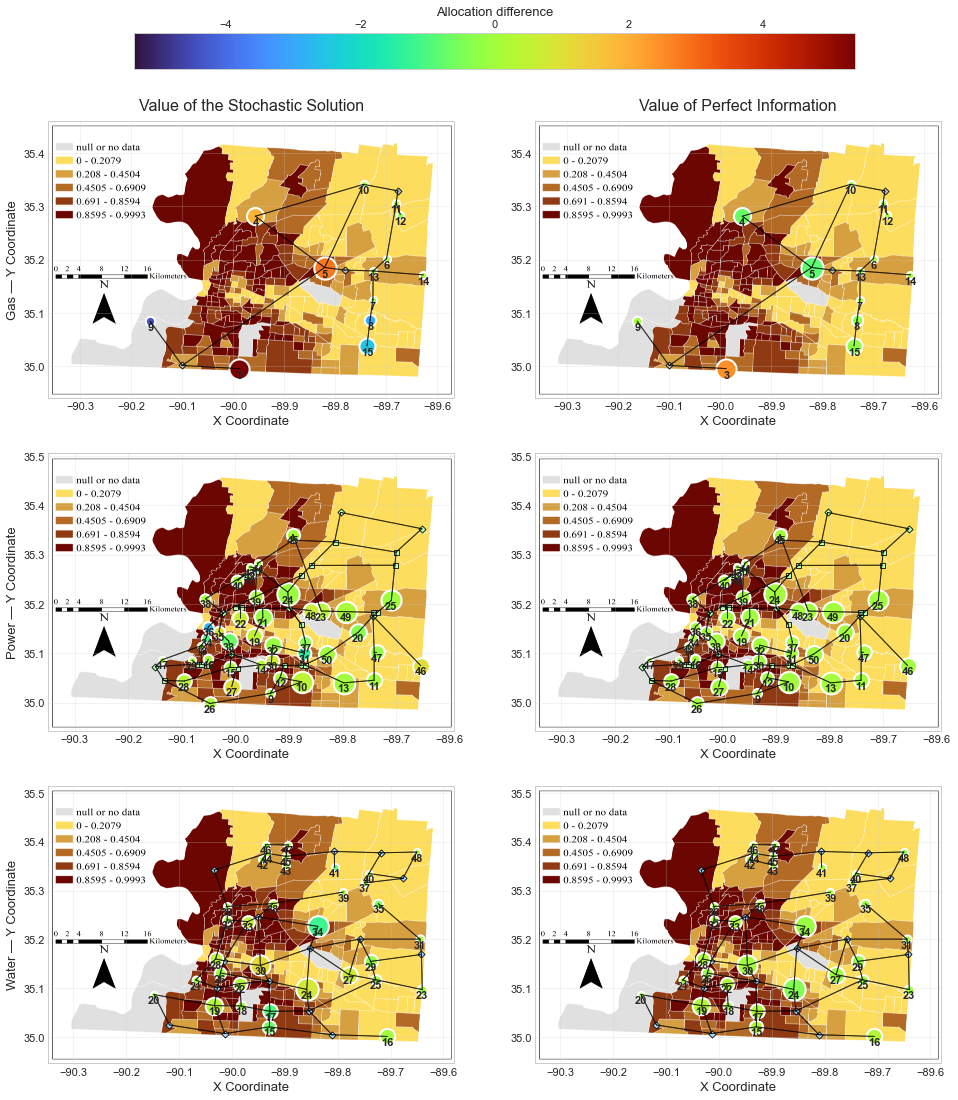

In [54]:

# --- config ---
approaches = ['DE_EEVS', 'WS_DE']  # keys in network_allocation_data
approach_titles = {'DE_EEVS': 'Value of the Stochastic Solution', 'WS_DE': 'Value of Perfect Information'}
networks = ['Gas', 'Power', 'Water']
bg_image = 'SVI.png'  # change per-network if needed
BASE = 500          # scales bubble AREA; tweak to taste
MIN_SIZE = 50         # optional minimum marker area so small-demand nodes remain visible
colors = {'Gas': 'silver', 'Power': '#B2FFB2', 'Water': '#A6D8FF'}

# --- gather all alloc_avg to set a global symmetric color scale centered at 0 ---
vals_all = []
for a in approaches:
    for net in networks:
        df = network_allocation_data[a][net]
        if 'alloc_avg' in df.columns:
            vals_all.append(df['alloc_avg'].to_numpy(dtype=float))
if vals_all:
    vals_all = np.concatenate(vals_all)
    vmax = np.nanmax(np.abs(vals_all)) if np.isfinite(vals_all).any() else 1.0
else:
    vmax = 1.0

norm = TwoSlopeNorm(vmin=-vmax, vcenter=0.0, vmax=vmax)
cmap = 'turbo'

# --- figure ---
fig, axes = plt.subplots(len(networks), len(approaches), figsize=(16, 18))
if axes.ndim == 1:  # just in case
    axes = axes.reshape(len(networks), len(approaches))

for r, net in enumerate(networks):
    # background image + extent from coords
    img = mpimg.imread(bg_image)
    xs = list(x_coord[net].values()); ys = list(y_coord[net].values())
    xmin, xmax = min(xs) - 0.2, max(xs) + 0.06
    ymin, ymax = min(ys) - 0.055, max(ys) + 0.12

    # precompute max demand for sizing
    max_dem = max(demand[net].values()) if len(demand[net]) else 1.0

    for c, a in enumerate(approaches):
        ax = axes[r, c]
        ax.imshow(img, extent=[xmin, xmax, ymin, ymax], aspect='auto')

        # (optional) draw arcs
        for (u, v) in A_k[net]:
            ax.plot([x_coord[net][u], x_coord[net][v]],
                    [y_coord[net][u], y_coord[net][v]],
                    linewidth=1, color='black', alpha=0.6)

        # supply/transshipment nodes (neutral silver markers)
        for node in supply_nodes[net]:
            ax.scatter(x_coord[net][node], y_coord[net][node],
                       marker='D', s=25, color=colors[net], edgecolor='k', linewidth=0.8)
        for node in transshipment_nodes[net]:
            ax.scatter(x_coord[net][node], y_coord[net][node],
                       marker='s', s=25, color=colors[net], edgecolor='k', linewidth=0.8)

        # demand nodes: white-edged circles, facecolor by alloc_avg, area by demand
        df = network_allocation_data[a][net]
        for _, row in df.iterrows():
            node = int(row['node'])
            if node in demand[net] and node in x_coord[net] and node in y_coord[net]:
                x = x_coord[net][node]; y = y_coord[net][node]
                dem = demand[net][node]
                size = max((dem / max_dem) * BASE, MIN_SIZE)
                val = float(row['alloc_avg'])

                ax.scatter(x, y, s=size,
                           facecolor=plt.cm.get_cmap(cmap)(norm(val)),
                           edgecolor='white', linewidth=2)

                # optional label
                ax.text(x, y-0.012, str(node), ha='center', va='center',
                        fontsize=11, weight='bold')

        # titles/labels
        if r == 0:
            ax.set_title(approach_titles[a], fontsize=16, pad=10)
        if c == 0:
            ax.set_ylabel(f'{net} — Y Coordinate', fontsize=13)
        ax.set_xlabel('X Coordinate', fontsize=13)
        ax.tick_params(axis='both', labelsize=11)
        ax.grid(True, alpha=0.3)

# unified colorbar at top
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

# make room for top colorbar
plt.subplots_adjust(top=0.92)  # shrink plot area to leave space at top

cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='horizontal',
                    fraction=0.035, pad=0.05, location='top')
cbar.set_label('Allocation difference', fontsize=13)
cbar.ax.tick_params(labelsize=11)

fig.savefig(f'allocation_diff_on_map.pdf', format='pdf', bbox_inches = 'tight')
plt.show()
